# CW7 - Statistical Thermodynamics
## Problem Set 4
### Aadil Aslam

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math
import random
import pandas as pd
from scipy import random
import math, random
from scipy.integrate import quad
import sympy
from random import randrange 

## Question 1 

Perform Monte Carlo simulations to make the corresponding plot for the
heat capacity, i.e. plot〈$C_{V}$〉/ kN vs. temperature with J / k = 0.5 K, and compare to corresponding
analytical solution. What is the effect of decreasing the coupling energy and why?

In [2]:
# Defining Constants
N = 500 # Number of sites
L = N*2000 # 2000 calculations per site 
J = 0.5 # Energy in Joules
k = 1.0 # Boltzmann constant in AU

Temp = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10]
print(Temp)

Heat_Capacities = []
Spins = []
Temperatures = []
Entropies = []

[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10]


In [3]:
def fact(x):
    f = 1
    for num in range(1, x+1):
        f *= num
    return f

In [4]:
for T in Temp:

    rnd = np.random.randint(N) # random number in range 1 to N
    spin = np.arange(N)
    P = np.exp(-4.0*J/(k*T)) # Probability in Metropolis test.

    for i in range(N):
        spin[i]=-1 # all spins aligned initially
    Enrg = -J*N      
    tot_Enrg = 0
    tot_Enrg2 = 0
    
    for num in range(L): # start Metropolis
        i = np.random.randint(N-2)   # chooses spin randomly

                        # Boundary condition follow
        index1 = i+1
        index2 = i-1
        rn = np.random.rand()
        DeltaE = 2*J*spin[i]*(spin[index1] + spin[index2])
     
        if index1 > N: 
            index1 = 1
        
        elif index2 < 1:
            index2 = N
                              # Metropolis test next
    
        elif DeltaE <= 0 or rn < P: # rand between 0 and 1
            spin[i] = -spin[i]  # flip spin
            Enrg = Enrg + DeltaE # add in energy

        tot_Enrg = tot_Enrg  + Enrg
        tot_Enrg2 = tot_Enrg2 + (Enrg**2)  # end metropolis loop
    avE =  tot_Enrg/L      # total <E > , N sites 
    avE2 = tot_Enrg2/L    # total <E2> , N sites
    E = avE/N  ## energy per spin
    E2 = avE2/N
    
    #    `<Energy>/spin`= avE/N
    #    `<Energy squared>/spin`= avE2/N
    Cv = 1/(k*T**2)*((avE2 - avE**2)/N)
    Spins.append(E)
    Heat_Capacities.append(Cv)
    Temperatures.append(T)
    
    count2 =1
    for s in range(1, N-1):
       
        if spin[s] != spin[s-1]:
            count2 = count2 + 1
            
## calc factorials
    N_fact = fact(N)    
    count2_fact = fact(count2)
    n_count2_fact = fact((N-count2))
    
    spn = N_fact/(count2_fact*n_count2_fact)
    spn2 = (np.log(spn))/N
    Entropies.append(spn2)
    
entropies = pd.Series(Entropies)
heat_capacities = pd.Series(Heat_Capacities)
temperatures = pd.Series(Temperatures)
spins = pd.Series(Spins)

data = {'temp (K)':temperatures, 'Heat cap (J/K)':heat_capacities, 'Energy per spin':spins, 'Entropy':entropies}
df = pd.DataFrame(data)
df.style

,temp (K),Heat cap (J/K),Energy per spin,Entropy
0,0.05,0,-0.5,0.0124292
1,0.1,0,-0.5,0.0124292
2,0.2,0.107284,-0.497634,0.0336921
3,0.3,0.489749,-0.46226,0.216277
4,0.4,0.508395,-0.423969,0.248314
5,0.5,0.418633,-0.382221,0.372862
6,0.75,0.314945,-0.292542,0.474204
7,1,0.195341,-0.232548,0.568728
8,1.5,0.105158,-0.163138,0.645676
9,2,0.0593447,-0.12487,0.670224


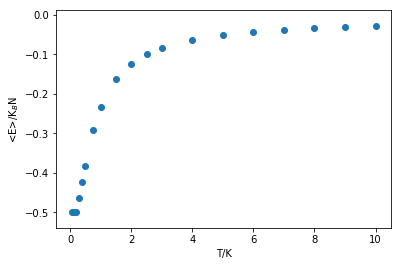

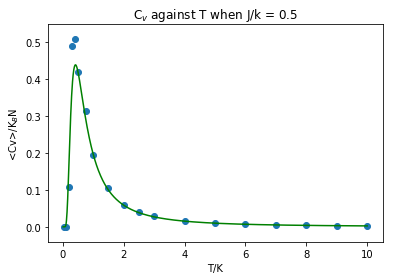

In [5]:
# Plot of <E>/KN against T

plt.scatter(Temperatures, Spins)
plt.xlabel('T/K')
plt.ylabel('<E>/K$_B$N')
plt.plot
plt.show()

# Plot of <Cv>/KN against T

# Analytical Solution
t_Cv = np.linspace(0.01, 10, 1000)
def Cv(t_Cv):
    return (k*4*(J**2)/((k**2)*(t_Cv**2)*(np.exp(J/(k*t_Cv))+np.exp(-J/(k*t_Cv)))**2))

plt.scatter(Temperatures, Heat_Capacities) # Monte Carlo
plt.xlabel('T/K')
plt.ylabel('<Cv>/K$_B$N')
plt.title('C$_v$ against T when J/k = 0.5') # Exact
plt.plot(t_Cv, Cv(t_Cv), 'g')
plt.show()

Decreasing the coupling energy causes the area under the curve to reduce. When compared to figure 7B in the handout the curve is thinner. This is because the spins are easier to flip into equal populations of parallel and anti-parallel states with a decreasing coupling constant.<br> The analytical solution is quite close to the Monte Carlo, this is because of the number of values in the linspace, other than 3 values they are quite accurate.

## Question 2 

Calculating the entropy

In [6]:
# Defining Constants
N = 500 # Number of sites
L = N*2000 # 2000 calculations per site 
J2 = 5.0 # Energy in Joules
k = 1.0 # Boltzmann constant in AU

Temp_2 = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10]
print(Temp_2)

Heat_Capacities_2 = []
Spins_2 = []
Temperatures_2 = []
Entropies_2 = []

[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10]


In [7]:
for T_2 in Temp_2:

    rnd = np.random.randint(N) # random number in range 1 to N
    spin = np.arange(N)
    P_2 = np.exp(-4.0*J2/(k*T_2)) # Probability in Metropolis test.

    for i in range(N):
        spin[i]=-1 # all spins aligned initially
    Enrg_2 = -J2*N      
    tot_Enrg_2 = 0
    tot_Enrg2_2 = 0
    
    for num in range(L): # start Metropolis
        i = np.random.randint(N-2)   # chooses spin randomly

                        # Boundary condition follow
        index1 = i+1
        index2 = i-1
        rn = np.random.rand()
        DeltaE_2 = 2*J2*spin[i]*(spin[index1] + spin[index2])
     
        if index1 > N: 
            index1 = 1
        
        elif index2 < 1:
            index2 = N
                              # Metropolis test next
    
        elif DeltaE_2 <= 0 or rn < P_2: # rand between 0 and 1
            spin[i] = -spin[i]  # flip spin
            Enrg_2 = Enrg_2 + DeltaE_2 # add in energy

        tot_Enrg_2 = tot_Enrg_2  + Enrg_2
        tot_Enrg2_2 = tot_Enrg2_2 + (Enrg_2**2)  # end metropolis loop
    avE_2 =  tot_Enrg_2/L      # total <E > , N sites 
    avE2_2 = tot_Enrg2_2/L    # total <E2> , N sites
    E_2 = avE_2/N  ## energy per spin
    E2_2 = avE2_2/N
    
    #    `<Energy>/spin`= avE/N
    #    `<Energy squared>/spin`= avE2/N
    Temperatures_2.append(T_2)
    
    count2 =1
    for s in range(1, N-1):
       
        if spin[s] != spin[s-1]:
            count2 = count2 + 1
            
## calc factorials
    N_fact = fact(N)    
    count2_fact = fact(count2)
    n_count2_fact = fact((N-count2))
    
    spn = N_fact/(count2_fact*n_count2_fact)
    spn2 = (np.log(spn))/N
    Entropies_2.append(spn2)
    
entropies_2 = pd.Series(Entropies_2)
temperatures_2 = pd.Series(Temperatures_2)

data = {'temp (K)':temperatures_2, 'Entropy':entropies_2}
df = pd.DataFrame(data)
df.style

,temp (K),Entropy
0,0.05,0.0124292
1,0.1,0.0124292
2,0.2,0.0124292
3,0.3,0.0124292
4,0.4,0.0124292
5,0.5,0.0124292
6,0.75,0.0124292
7,1,0.0124292
8,1.5,0.0124292
9,2,0.0336921


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


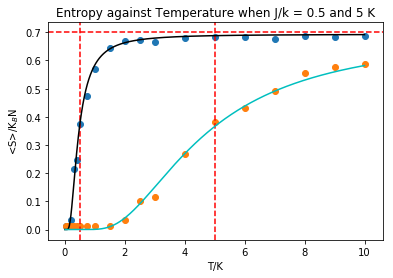

In [8]:
# Entropy verses Temperature when J = 0.5 K and when J = 5 K

# Theoretical Solution J/k = 0.5
t_S = np.linspace(0.01,10,1000)
def S(t_S):
    return (k*(np.log(np.exp(2*J/(k*t_S))+1)-2*J/t_S*(np.exp(2*J/(k*t_S))/(np.exp(2*J/(k*t_S))+1))))

# Theoretical Solution J/k = 5
t_S1 = np.linspace(0.01,10,1000)
def S1(t_S1):
    return (k*(np.log(np.exp(2*J2/(k*t_S1))+1)-2*J2/t_S1*(np.exp(2*J2/(k*t_S1))/(np.exp(2*J2/(k*t_S1))+1))))

plt.scatter(Temperatures, Entropies) # Monte Carlo J/k = 0.5
plt.scatter(Temperatures_2, Entropies_2) # Monte Carlo J/k = 5
plt.xlabel('T/K')
plt.ylabel('<S>/K$_B$N')
plt.title('Entropy against Temperature when J/k = 0.5 and 5 K')
plt.axhline(y = 0.7, color = 'r', linestyle = '--')
plt.axvline(x = 0.5, color = 'r', linestyle = '--')
plt.axvline(x = 5, color = 'r', linestyle = '--')
plt.plot(t_S, S(t_S), 'k') # Exact J/k = 0.5
plt.plot(t_S1, S1(t_S1), 'c') # Exact J/k = 5
plt.show()

The entropy is close to 0 near 0 Kelvin, this is because the system is ordered with regards to all the spins being in the same state, either parallel or antiparallel. As the temperature increases, the entropy increases due to energy being supplied to the system. This causes more randomisation in the way you can arrange the spins in the system.<br> At a higher coupling energy the entropy increases at a slower rate. This is because the surrounding heat bath initially provides energy that is less than the coupling energy. When the heat bath provides more energy than the coupling energy the coupling between spins becomes less important. As shown on the graph, when the thermal energy becomes larger than the coupling energy the curve starts to plateau. Sizes of groups with similar spin states are diminished but the number of groups increase which overall increases the disorder.

## Question 3

When J=0 there are no spin-spin interactions, only the spin-external field interaction, H, caused by the presence of the magnetic field. <br> 

The partition function, Z, is now found to be: <br>
Z = (exp(β*)+exp(-β*h))$^N$ <br>
Z = (2cosh(β*h))$^N$ <br>

Hence it can be seen that now: <br>
U = kt$^2$*(dln(2cos(h/kT))/dt) = -h*sinh(h/kT)/cosh(h/kT) = -h*tanh(h/kT) <br>
Cv = (dU/dT) = d(-h*tanh(h/kT))/dT = h$^2$*sech$^2$(h/kT)/kT$^2$ = 4h$^2$/(kT$^2$(exp(h/kT)+exp(-h/kT))) <br>
S = k*ln(z)+k*T(dln(z)/dT) = k*ln(exp(2h/kT)+1)-2J/T*exp(2h/kT)/(exp(2J/kT)+1) <br>

## Self Assessment

I have completed most of the tasks and performed a Monte Carlo loop to answer the questions.

When running the code I ran into a problem of the programme calculating the entropy values for when J/k = 5 K multiple times, this caused lots of problems when trying to compare the two.

I helped others translating the maple code to python

I would give myself a 7-8 out of 10 because I feel that what I did do, I did it well.